In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sm1
%matplotlib inline

In [76]:
data = {
        'Output, Q' : [80,150,135,165,95,130,110],
        'Labour, L' : [60,100,100,120,70,90,80],
        'Capital, K' : [50,100,80,100,60,80,70],
       }
df = pd.DataFrame(data, index = ['B','C','D','E','F','G','H'],columns = ['Output, Q','Labour, L','Capital, K'])
df

,"Output, Q","Labour, L","Capital, K"
B,80,60,50
C,150,100,100
D,135,100,80
E,165,120,100
F,95,70,60
G,130,90,80
H,110,80,70


In [77]:
#Q2a. Calculating basic statistics for data series (Q,L,K)
print("Mean: \n",df.mean(axis=0),"\n---")
print("Variance: \n",df.var(axis=0),"\n---")
print("Standard Deviation: \n",df.std(axis=0),"\n---")
print("Median: \n",df.median(axis=0),"\n---")

Mean: 
 Output, Q     123.571429
Labour, L      88.571429
Capital, K     77.142857
dtype: float64 
---
Variance: 
 Output, Q     914.285714
Labour, L     414.285714
Capital, K    357.142857
dtype: float64 
---
Standard Deviation: 
 Output, Q     30.237158
Labour, L     20.354010
Capital, K    18.898224
dtype: float64 
---
Median: 
 Output, Q     130.0
Labour, L      90.0
Capital, K     80.0
dtype: float64 
---


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B98C4548D0>,
      dtype=object)

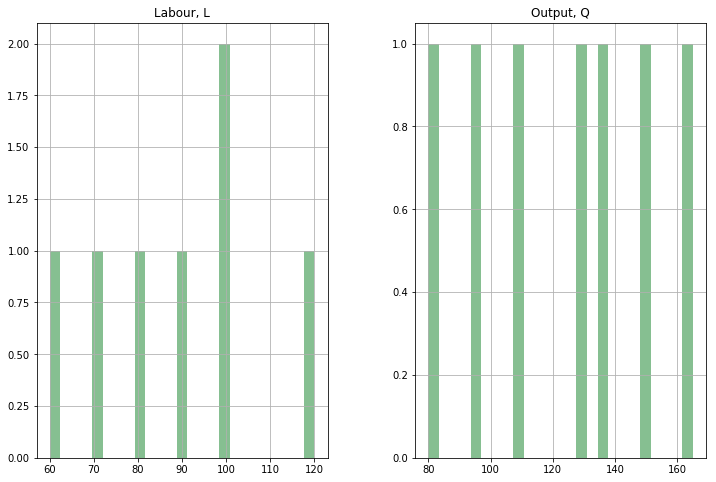

In [130]:
#Q2b. To plot histograms of data series Q and L
df.hist(column=['Output, Q','Labour, L'],color='#86bf91',bins=25,figsize=(12,8))

In [118]:
#Q2c. log transformation of data series
logdata=np.log(df)
logdata

,"Output, Q","Labour, L","Capital, K"
B,4.382027,4.094345,3.912023
C,5.010635,4.605170,4.605170
D,4.905275,4.605170,4.382027
E,5.105945,4.787492,4.605170
F,4.553877,4.248495,4.094345
G,4.867534,4.499810,4.382027
H,4.700480,4.382027,4.248495


In [121]:
#Q2d. fitting multiple regression model
y=logdata['Output, Q']
x1=logdata['Labour, L']
x2=logdata['Capital, K']
model=sm.ols(formula="y~x1+x2",data=logdata).fit()
print(model.params)

Intercept    0.146233
x1           0.548427
x2           0.508741
dtype: float64


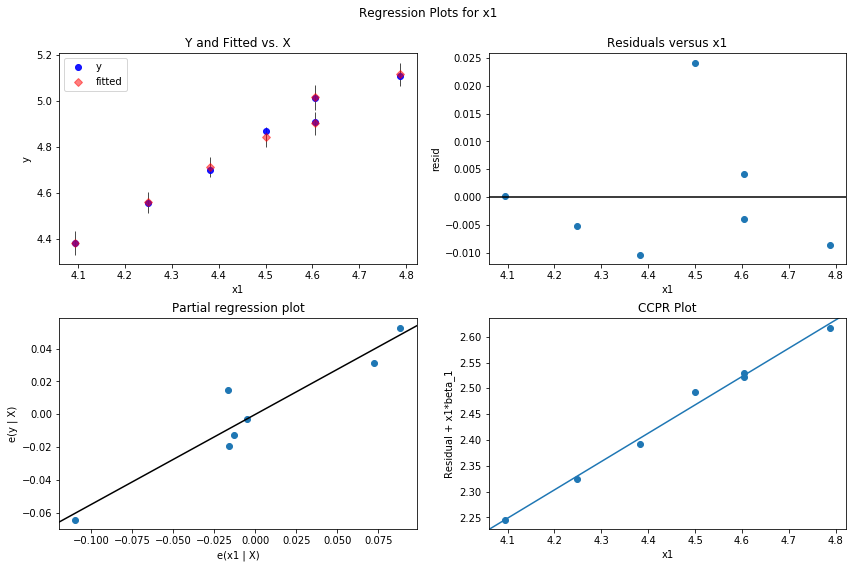

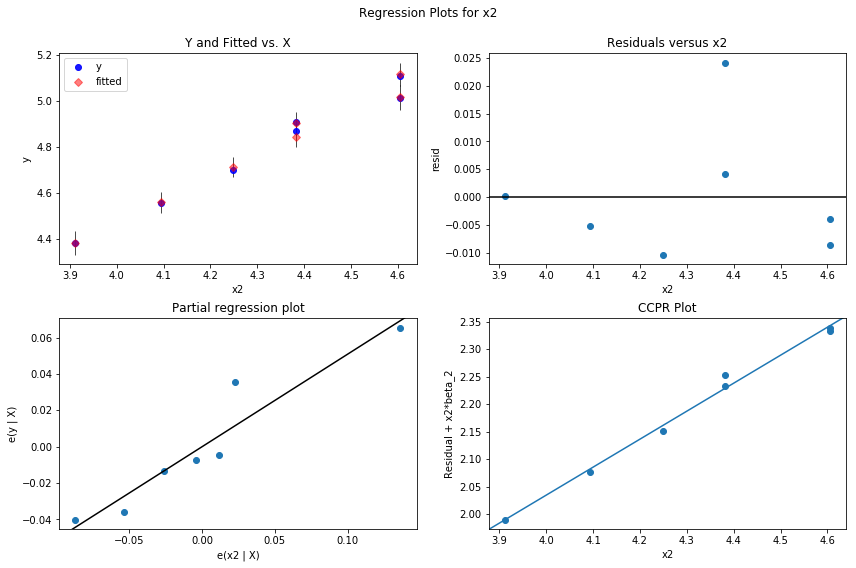

In [114]:
#Q2e. Residual plots for 2 independent variables in model (log transform form)
fig = plt.figure(figsize=(12,8))
fig = sm1.graphics.plot_regress_exog(model, "x1", fig=fig)             #Residual plot for Labour, L
fig1 = plt.figure(figsize=(12,8))
fig1 = sm1.graphics.plot_regress_exog(model, "x2", fig=fig1)           #Residual plot for Capital, K

In [116]:
#Q2f. calculating adjusted R square of model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        01:11:31   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.2

C:\Users\Umesh\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
